In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential

In [3]:
df=pd.read_csv("house_price.csv")

In [4]:
df.head(8)

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000
5,Whitefield,3,1,1760,5,8,39500
6,Whitefield,3,1,1870,10,3,35000
7,Whitefield,3,0,2200,1,10,42000


In [5]:
df.info

<bound method DataFrame.info of          Location  BHK  Furnishing  Sq.ft  Old(years)  Floor  Price
0    Bommanahalli    3           1   3000           1      3  28000
1    Bommanahalli    3           1   1650          10      0  18000
2      Whitefield    2           0   1000           5      3  16400
3      Whitefield    3           0   1600           1      9  27000
4      Whitefield    2           1   1200           5      1  20000
..            ...  ...         ...    ...         ...    ...    ...
995  Bommanahalli    3           1   1460           1      2  25000
996    Whitefield    3           0   2100           1      7  28000
997  Bommanahalli    2           0   1033           5      0  16500
998  Bommanahalli    3           0   1500          10      1  22000
999    Whitefield    3           1   1768           5     11  30000

[1000 rows x 7 columns]>

In [6]:
df.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [8]:
df.isnull().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

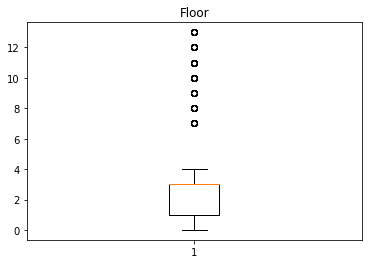

In [12]:
plt.boxplot(df["Floor"])
plt.title("Floor")
plt.show()

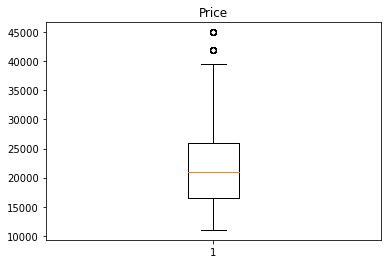

In [13]:
plt.boxplot(df["Price"])
plt.title("Price")
plt.show()

In [14]:
lb=LabelEncoder()
df["Location"]= lb.fit_transform(df["Location"])

In [15]:
X=df.drop('Price',axis =1)
y=df["Price"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
for i in range(1,20):
    dtc=DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_test)
    print(f'{i}    {r2_score(y_test, pred)}')

1    0.6123985057941428
2    0.8209900646986041
3    0.9097294835511683
4    0.9494901223160119
5    0.9746404917565515
6    0.9924858990479434
7    0.9989459820752257
8    1.0
9    1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0


In [18]:
dfr=DecisionTreeRegressor(max_depth=8)
dfr.fit(X_train,y_train)
pred = dfr.predict(X_test)
r2_score(y_test,pred)

1.0

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
r2_score(y_test,pred)

0.8529203286456313